In [7]:
from cirq import LineQubit, X, H, Circuit, inverse, Simulator, Z
from cirq.contrib.svg import SVGCircuit
from cirq.contrib.qcircuit import circuit_to_latex_using_qcircuit

In [2]:
def my_operator(q: LineQubit):
    return [X(q),
            H(q)]

In [3]:
q = LineQubit(0)
ops1 = my_operator(q)
ops2 = inverse(ops1)
c = Circuit(ops1, Z(q), ops2)

In [4]:
print(c)

0: ───X───H───Z───H───X───


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


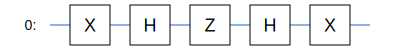

In [5]:
SVGCircuit(c)

In [9]:
import errno
import os

from cirq import circuits
from pylatex import Document, NoEscape, Package

def circuit_to_pdf_using_qcircuit_via_tex(
    circuit: circuits.Circuit,
    filepath: str,
    pdf_kwargs=None,
    qcircuit_kwargs=None,
    clean_ext=('dvi', 'ps'),
    documentclass='article',
):
    """Compiles the QCircuit-based latex diagram of the given circuit.
    Args:
        circuit: The circuit to produce a pdf of.
        filepath: Where to output the pdf.
        pdf_kwargs: The arguments to pass to generate_pdf.
        qcircuit_kwargs: The arguments to pass to
            circuit_to_latex_using_qcircuit.
        clean_ext: The file extensions to clean up after compilation. By
            default, latexmk is used with the '-pdfps' flag, which produces
            intermediary dvi and ps files.
        documentclass: The documentclass of the latex file.
    Raises:
        OSError, IOError: If cleanup fails.
    """
    pdf_kwargs = {
        'compiler': 'latexmk',
        'compiler_args': ['-pdfps'],
        **({} if pdf_kwargs is None else pdf_kwargs),
    }
    qcircuit_kwargs = {} if qcircuit_kwargs is None else qcircuit_kwargs
    tex = circuit_to_latex_using_qcircuit(circuit, **qcircuit_kwargs)
    doc = Document(documentclass=documentclass, document_options='dvips')
    doc.packages.append(Package('amsmath'))
    doc.packages.append(Package('qcircuit'))
    doc.preamble.append(Package('inputenc', options=['utf8']))
    doc.append(NoEscape(tex))
    doc.generate_pdf(filepath, **pdf_kwargs)
    for ext in clean_ext:
        try:
            os.remove(filepath + '.' + ext)
        except (OSError, IOError) as e:
            if e.errno != errno.ENOENT:
                raise

In [12]:
circuit_to_pdf_using_qcircuit_via_tex(c, "test")